Aufgabe 40.

Im Datensatz Student Social Media Addiction.csv sind unter anderem die tägliche Nutzungsdauer sozialer Medien in Stunden (Avg_Daily_Usage_Hours), der Addicted_Score sowie die am häufigsten genutzte Plattform (Most_Used_Platform) enthalten.

In [2]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [6]:
df = pd.read_csv('../data/Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [32]:
df.Avg_Daily_Usage_Hours.describe()

count    705.000000
mean       4.918723
std        1.257395
min        1.500000
25%        4.100000
50%        4.800000
75%        5.800000
max        8.500000
Name: Avg_Daily_Usage_Hours, dtype: float64

a) Schätzen Sie ein Regressionsmodell, das den Abhängigkeitsscore durch die tägliche Nutzungsdauer und TikTok als häufigst-genutzte Plattform sowie deren Interaktion erklärt.

In [10]:
df = df[['Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Addicted_Score']]
df['is_tiktok'] = (df.Most_Used_Platform == 'TikTok').astype(int)
df = df.drop(columns=['Most_Used_Platform'])
df.head()

,Avg_Daily_Usage_Hours,Addicted_Score,is_tiktok
0,5.2,8,0
1,2.1,3,0
2,6.0,9,1
3,3.0,4,0
4,4.5,7,0


In [12]:
df.Addicted_Score.value_counts().sort_index()

Addicted_Score
2      1
3     16
4     83
5    136
6     61
7    209
8    144
9     55
Name: count, dtype: int64

In [ ]:
df['Addicted_Score'] = df['Addicted_Score'].replace({2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7})
df['Addicted_Score'].value_counts().sort_index()

Addicted_Score
0      1
1     16
2     83
3    136
4     61
5    209
6    144
7     55
Name: count, dtype: int64

In [14]:
# interaktion zwischen tiktok und daily usage
df['usage_x_tiktok'] = df['Avg_Daily_Usage_Hours'] * df['is_tiktok']
df.head()

,Avg_Daily_Usage_Hours,Addicted_Score,is_tiktok,usage_x_tiktok
0,5.2,6,0,0.0
1,2.1,1,0,0.0
2,6.0,7,1,6.0
3,3.0,2,0,0.0
4,4.5,5,0,0.0


In [15]:
X = df[['Avg_Daily_Usage_Hours', 'is_tiktok', 'usage_x_tiktok']]
y = df['Addicted_Score']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     646.2
Date:                Wed, 14 May 2025   Prob (F-statistic):          2.75e-201
Time:                        14:47:30   Log-Likelihood:                -858.17
No. Observations:                 705   AIC:                             1724.
Df Residuals:                     701   BIC:                             1743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.92

$$
\hat{y} = -0.9204 + 1.0585 \times \text{Nutzungsdauer} + 2.4111 \times \text{Tiktok} - 0.3219 \times \text{(Tiktok x Nutzungsdauer)}
$$

$$
\hat{y} = -0.9204 + 2.4111 \times \text{Tiktok} + ( 1.0585 - (0.3219 \times \text{Tiktok})) \times \text{Nutzungsdauer}
$$

Für Tiktok Nutzer:
$$
\hat{y} \ (\text{Tiktok}=1) = 1.4907 + 0.7365 \times \text{Nutzungsdauer}
$$

Für **nicht** Tiktok Nutzer:
$$
\hat{y} \ (\text{Tiktok}=0) = -0.9204 + 1.0585 \times \text{Nutzungsdauer}
$$



b) Wie sieht der Zusammenhang zwischen Nutzungsdauer und Addicted Score bei
Nicht-TikTok-Nutzer:innen aus?

1.0585

c) Wie verändert sich dieser Zusammenhang bei TikTok-Nutzer:innen? Berechnen Sie den erwarteten Addicted Score für eine tägliche Nutzungsdauer von 3 Stunden
- bei TikTok-Nutzung,
- ohne TikTok-Nutzung.


Tiktok Nutzer haben 0.32 Steigung weniger als **nicht** Tiktok Nutzer. 

In [24]:
tiktok_user = model.predict([1, 3, 1, 3])
tiktok_user

array([3.70049716])

In [25]:
not_tiktok_user = model.predict([1, 3, 0, 0])
not_tiktok_user

array([2.25516156])

d) Interpretieren Sie den Interaktionsterm sowohl statistisch als auch inhaltlich.

Bei Tiktok Nutzer, die Steigung von Nutzungsdauer -0.32 kleiner ist als bei **nicht** Tiktok Nutzer.
Inhaltlich heißt es dass sie 0.32 Einheit pro Stunde weniger Süchtig werden als nicht Tiktok Nutzern.

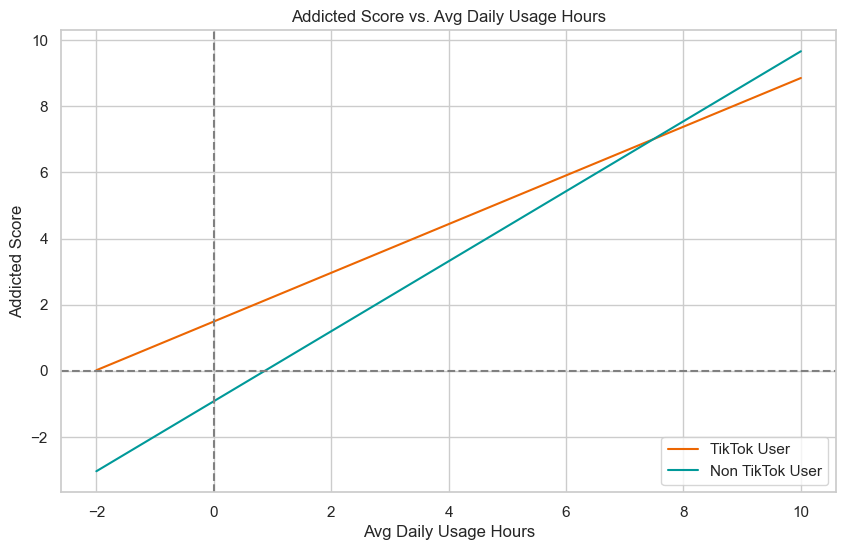

In [39]:
# plot a line with b0=1.49 and b1=0.73
def generate_line(x, b0, b1):
    return b0 + b1 * x
x = np.linspace(-2, 10, 100)
tiktok_user = generate_line(x, 1.4907, 0.7365)
nicht_tiktok_user = generate_line(x, -0.9204, 1.0585)
plt.figure(figsize=(10, 6))
plt.plot(x, tiktok_user, label='TikTok User', color=healthy_orange)
plt.plot(x, nicht_tiktok_user, label='Non TikTok User', color=siemens_petrol)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Addicted Score vs. Avg Daily Usage Hours')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Addicted Score')
plt.legend()
plt.show()

f) Warum ist es sinnvoll, Interaktionsterme in Regressionsmodellen zu berücksichtigen? Erläutern Sie anhand dieses Beispiels oder eines eigenen.

Die Interaktionsterme werden verwendet, um die Zusammenhänge zwischen den Prädiktoren zu berücksichtigen. In diesem Beispiel hängt die Nutzungsdauer mit der Plattform zusammen. Deshalb unterscheidet sich die Steigung der Nutzungsdauer zwischen TikTok Nutzern und **nicht** TikTok Nutzern. Bei qualitativen Variablen ist das leichter zu verstehen. Bei quantitativen Variablen bedeutet das, dass die Steigung eines Merkmals davon abhängt, wie stark ein anderes Merkmal zunimmt oder abnimmt.